In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




===== RQ1: Frequency (with quadratic) & Duration -> CGPA =====
                            OLS Regression Results                            
Dep. Variable:                   CGPA   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     18.83
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           5.67e-11
Time:                        13:37:05   Log-Likelihood:                -293.80
No. Observations:                 237   AIC:                             595.6
Df Residuals:                     233   BIC:                             609.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

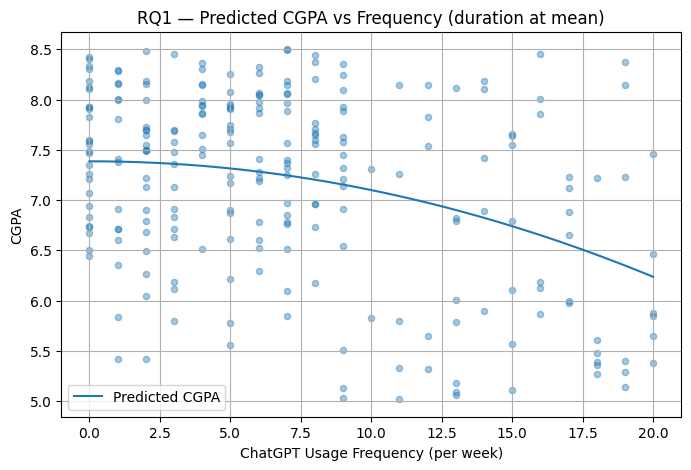

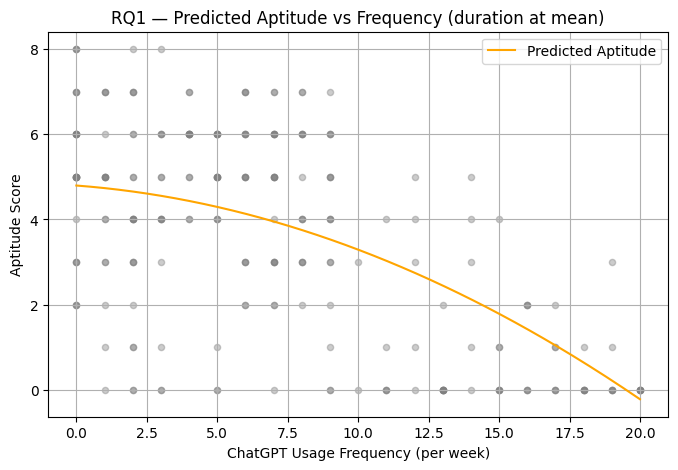



===== RQ2: ANOVA — CGPA by Reason =====
               sum_sq     df         F    PR(>F)
C(Reason)   11.755396    2.0  7.090057  0.001025
Residual   193.987352  234.0       NaN       NaN

Group stats (CGPA):
                    mean       std  count
Reason                                   
better answers  7.273617  0.817908     94
no idea         6.720980  1.078333     51
saves time      7.250870  0.899528     92


/tmp/ipython-input-130146773.py:110: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats_cgpa = df.groupby('Reason')['CGPA'].agg(['mean','std','count'])


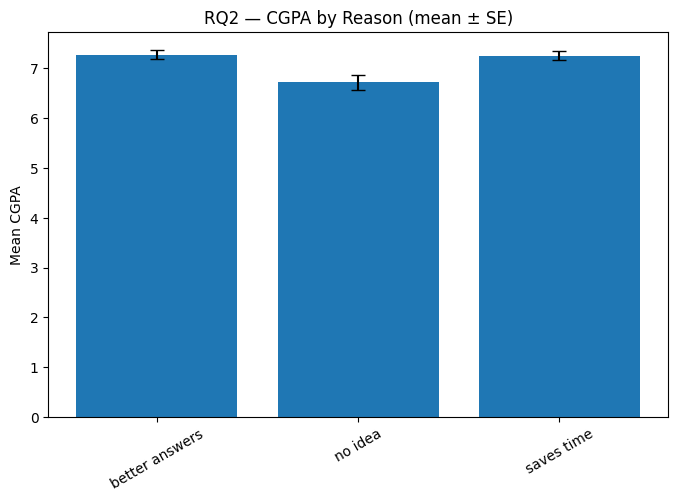



===== RQ2: ANOVA — Aptitude by Reason =====
                sum_sq     df          F        PR(>F)
C(Reason)   340.042430    2.0  37.221261  9.222926e-15
Residual   1068.877401  234.0        NaN           NaN

Group stats (Aptitude):
                    mean       std  count
Reason                                   
better answers  4.468085  2.227406     94
no idea         1.352941  1.683134     51
saves time      3.956522  2.262514     92


/tmp/ipython-input-130146773.py:134: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats_apt = df.groupby('Reason')['Aptitude_Score'].agg(['mean','std','count'])


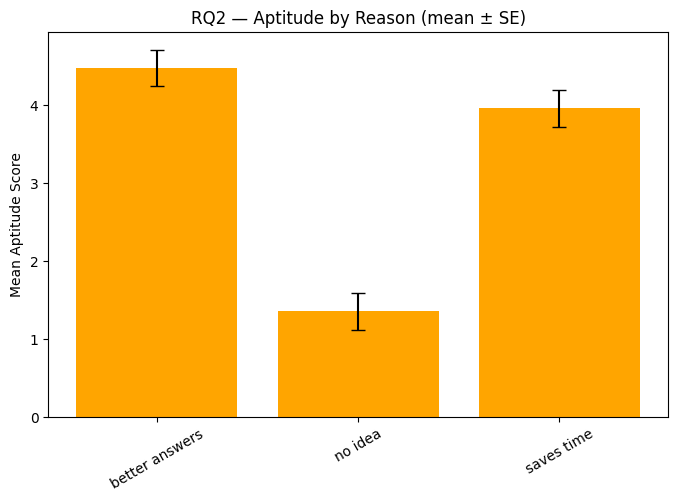



===== RQ3: Interaction — Aptitude × Frequency -> CGPA =====
                            OLS Regression Results                            
Dep. Variable:                   CGPA   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     165.5
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           1.78e-57
Time:                        13:37:06   Log-Likelihood:                -184.26
No. Observations:                 237   AIC:                             376.5
Df Residuals:                     233   BIC:                             390.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

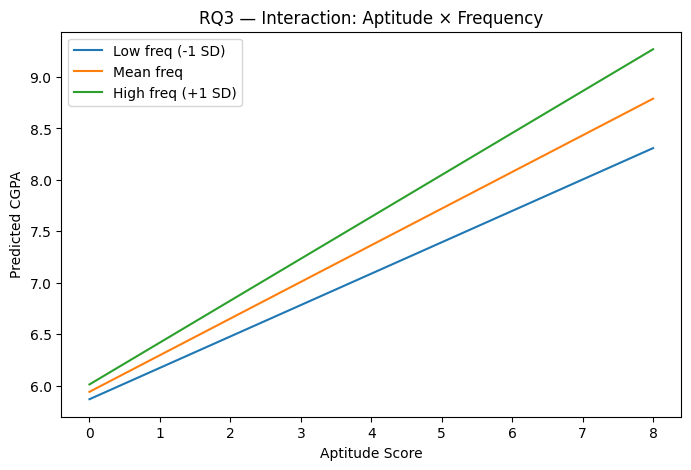



===== RQ3: Interaction — Aptitude × Duration -> CGPA =====
                            OLS Regression Results                            
Dep. Variable:                   CGPA   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     145.2
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           4.46e-53
Time:                        13:37:07   Log-Likelihood:                -194.59
No. Observations:                 237   AIC:                             397.2
Df Residuals:                     233   BIC:                             411.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

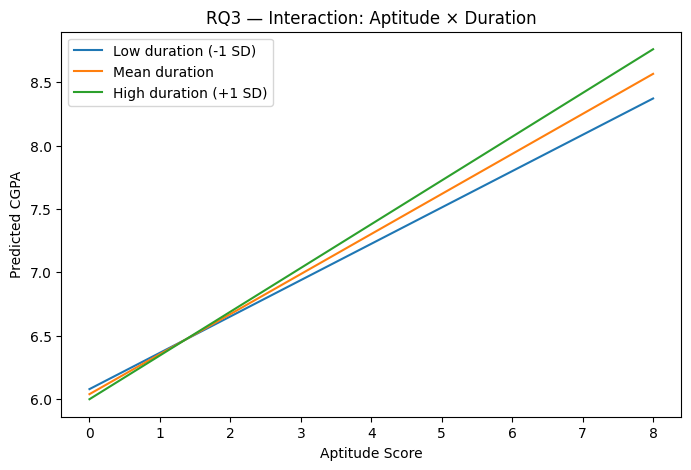



Analysis complete ✅


In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import os

csv_path = '/content/drive/MyDrive/Data/chatgpt_critical_thinking_dataset_extended_new.csv'
output_dir = '/content/analysis_results'
os.makedirs(output_dir, exist_ok=True)

df = pd.read_csv(csv_path)

# preprocess：center

df['freq_c'] = df['ChatGPT_Usage_Frequency_Per_Week'] - df['ChatGPT_Usage_Frequency_Per_Week'].mean()
df['freq_c2'] = df['freq_c'] ** 2
df['duration_c'] = df['Average_Session_Duration_Minutes'] - df['Average_Session_Duration_Minutes'].mean()
df['Aptitude_c'] = df['Aptitude_Score'] - df['Aptitude_Score'].mean()
df['Reason'] = df['Reason_For_Using_ChatGPT'].astype('category')

def error_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

# RQ1: Regression (freq with quadratic) -> CGPA and Aptitude


print("\n\n===== RQ1: Frequency (with quadratic) & Duration -> CGPA =====")
formula_cgpa = 'CGPA ~ freq_c + freq_c2 + duration_c'
model_cgpa = smf.ols(formula=formula_cgpa, data=df).fit()
preds_cgpa = model_cgpa.predict(df)
mae_cgpa, mse_cgpa, rmse_cgpa = error_metrics(df['CGPA'], preds_cgpa)

print(model_cgpa.summary())
print("--- RQ1 CGPA error metrics ---")
print(f"MAE: {mae_cgpa:.4f}, MSE: {mse_cgpa:.4f}, RMSE: {rmse_cgpa:.4f}")
print(f"R-squared: {model_cgpa.rsquared:.4f}, Adj R-squared: {model_cgpa.rsquared_adj:.4f}")
# Save summary
with open(os.path.join(output_dir,'RQ1_CGPA_summary.txt'),'w') as f: f.write(model_cgpa.summary().as_text())

print("\n\n===== RQ1: Frequency (with quadratic) & Duration -> Aptitude =====")
formula_apt = 'Aptitude_Score ~ freq_c + freq_c2 + duration_c'
model_apt = smf.ols(formula=formula_apt, data=df).fit()
preds_apt = model_apt.predict(df)
mae_apt, mse_apt, rmse_apt = error_metrics(df['Aptitude_Score'], preds_apt)

print(model_apt.summary())
print("--- RQ1 Aptitude error metrics ---")
print(f"MAE: {mae_apt:.4f}, MSE: {mse_apt:.4f}, RMSE: {rmse_apt:.4f}")
print(f"R-squared: {model_apt.rsquared:.4f}, Adj R-squared: {model_apt.rsquared_adj:.4f}")
with open(os.path.join(output_dir,'RQ1_Aptitude_summary.txt'),'w') as f: f.write(model_apt.summary().as_text())

# Visualization: separate plots for CGPA and Aptitude vs Frequency


freq_vals = np.linspace(df['ChatGPT_Usage_Frequency_Per_Week'].min(),
                        df['ChatGPT_Usage_Frequency_Per_Week'].max(), 200)
freq_c_vals = freq_vals - df['ChatGPT_Usage_Frequency_Per_Week'].mean()

# CGPA plot
pred_cgpa_curve = model_cgpa.predict(pd.DataFrame({
    'freq_c': freq_c_vals,
    'freq_c2': freq_c_vals**2,
    'duration_c': [0]*len(freq_c_vals)  # hold duration at mean
}))
plt.figure(figsize=(8,5))
plt.plot(freq_vals, pred_cgpa_curve, label='Predicted CGPA')
plt.scatter(df['ChatGPT_Usage_Frequency_Per_Week'], df['CGPA'], alpha=0.4, s=20)
plt.xlabel("ChatGPT Usage Frequency (per week)")
plt.ylabel("CGPA")
plt.title("RQ1 — Predicted CGPA vs Frequency (duration at mean)")
plt.legend()
plt.grid(True)
pfile = os.path.join(output_dir,'RQ1_pred_CGPA_vs_freq.png')
plt.savefig(pfile, dpi=200, bbox_inches='tight')
plt.show()

# Aptitude plot
pred_apt_curve = model_apt.predict(pd.DataFrame({
    'freq_c': freq_c_vals,
    'freq_c2': freq_c_vals**2,
    'duration_c': [0]*len(freq_c_vals)
}))
plt.figure(figsize=(8,5))
plt.plot(freq_vals, pred_apt_curve, label='Predicted Aptitude', color='orange')
plt.scatter(df['ChatGPT_Usage_Frequency_Per_Week'], df['Aptitude_Score'], alpha=0.4, s=20, color='gray')
plt.xlabel("ChatGPT Usage Frequency (per week)")
plt.ylabel("Aptitude Score")
plt.title("RQ1 — Predicted Aptitude vs Frequency (duration at mean)")
plt.legend()
plt.grid(True)
pfile = os.path.join(output_dir,'RQ1_pred_Aptitude_vs_freq.png')
plt.savefig(pfile, dpi=200, bbox_inches='tight')
plt.show()

# RQ2: ANOVA (Reason -> CGPA / Aptitude)


print("\n\n===== RQ2: ANOVA — CGPA by Reason =====")
anova_model_cgpa = ols('CGPA ~ C(Reason)', data=df).fit()
anova_table_cgpa = anova_lm(anova_model_cgpa, typ=2)

print(anova_table_cgpa)
group_stats_cgpa = df.groupby('Reason')['CGPA'].agg(['mean','std','count'])
print("\nGroup stats (CGPA):")
print(group_stats_cgpa)
with open(os.path.join(output_dir,'RQ2_ANOVA_CGPA.txt'),'w') as f: f.write(anova_table_cgpa.to_string())

# Visualization: CGPA by Reason (barplot with errorbars)


plt.figure(figsize=(8,5))
means = group_stats_cgpa['mean']
errs = group_stats_cgpa['std'] / np.sqrt(group_stats_cgpa['count'])  # standard error
x = np.arange(len(means))
plt.bar(x, means, yerr=errs, capsize=5)
plt.xticks(x, group_stats_cgpa.index, rotation=30)
plt.ylabel("Mean CGPA")
plt.title("RQ2 — CGPA by Reason (mean ± SE)")
pfile = os.path.join(output_dir,'RQ2_CGPA_by_reason.png')
plt.savefig(pfile, dpi=200, bbox_inches='tight')
plt.show()

print("\n\n===== RQ2: ANOVA — Aptitude by Reason =====")
anova_model_apt = ols('Aptitude_Score ~ C(Reason)', data=df).fit()
anova_table_apt = anova_lm(anova_model_apt, typ=2)
print(anova_table_apt)
group_stats_apt = df.groupby('Reason')['Aptitude_Score'].agg(['mean','std','count'])
print("\nGroup stats (Aptitude):")
print(group_stats_apt)
with open(os.path.join(output_dir,'RQ2_ANOVA_Aptitude.txt'),'w') as f: f.write(anova_table_apt.to_string())

# Visualization: Aptitude by Reason


plt.figure(figsize=(8,5))
means = group_stats_apt['mean']
errs = group_stats_apt['std'] / np.sqrt(group_stats_apt['count'])  # standard error
x = np.arange(len(means))
plt.bar(x, means, yerr=errs, capsize=5, color='orange')
plt.xticks(x, group_stats_apt.index, rotation=30)
plt.ylabel("Mean Aptitude Score")
plt.title("RQ2 — Aptitude by Reason (mean ± SE)")
pfile = os.path.join(output_dir,'RQ2_Aptitude_by_reason.png')
plt.savefig(pfile, dpi=200, bbox_inches='tight')
plt.show()


# RQ3: Interaction models (Aptitude × Frequency) and (Aptitude × Duration)


print("\n\n===== RQ3: Interaction — Aptitude × Frequency -> CGPA =====")
formula_int_freq = 'CGPA ~ Aptitude_c + freq_c + Aptitude_c:freq_c'
model_int_freq = smf.ols(formula=formula_int_freq, data=df).fit()
preds_pre = model_int_freq.predict(df)
mae_pre, mse_pre, rmse_pre = error_metrics(df['CGPA'], preds_pre)
print(model_int_freq.summary())
print(f"MAE: {mae_pre:.4f}, MSE: {mse_pre:.4f}, RMSE: {rmse_pre:.4f}")
ci_pre = model_int_freq.conf_int().loc['Aptitude_c:freq_c']
print("95% CI for interaction (Aptitude_c:freq_c):", ci_pre.values)
with open(os.path.join(output_dir,'RQ3_int_freq_summary.txt'),'w') as f: f.write(model_int_freq.summary().as_text())

# Visualization: interaction (Aptitude × Frequency)
apt_vals = np.linspace(df['Aptitude_c'].min(), df['Aptitude_c'].max(), 100)
freq_sd = df['freq_c'].std()
plt.figure(figsize=(8,5))
for level, label in zip([-1,0,1], ['Low freq (-1 SD)','Mean freq','High freq (+1 SD)']):
    fval = level * freq_sd
    preds = model_int_freq.predict(pd.DataFrame({'Aptitude_c': apt_vals, 'freq_c': [fval]*len(apt_vals)}))
    plt.plot(apt_vals + df['Aptitude_Score'].mean(), preds, label=label)
plt.xlabel("Aptitude Score")
plt.ylabel("Predicted CGPA")
plt.title("RQ3 — Interaction: Aptitude × Frequency")
plt.legend()
pfile = os.path.join(output_dir,'RQ3_interaction_apt_freq.png')
plt.savefig(pfile, dpi=200, bbox_inches='tight')
plt.show()

print("\n\n===== RQ3: Interaction — Aptitude × Duration -> CGPA =====")
formula_int_dur = 'CGPA ~ Aptitude_c + duration_c + Aptitude_c:duration_c'
model_int_dur = smf.ols(formula=formula_int_dur, data=df).fit()
preds_id = model_int_dur.predict(df)
mae_id, mse_id, rmse_id = error_metrics(df['CGPA'], preds_id)
print(model_int_dur.summary())
print(f"MAE: {mae_id:.4f}, MSE: {mse_id:.4f}, RMSE: {rmse_id:.4f}")
ci_id = model_int_dur.conf_int().loc['Aptitude_c:duration_c']
print("95% CI for interaction (Aptitude_c:duration_c):", ci_id.values)
with open(os.path.join(output_dir,'RQ3_int_dur_summary.txt'),'w') as f: f.write(model_int_dur.summary().as_text())

# Visualization: interaction (Aptitude × Duration)
dur_sd = df['duration_c'].std()
plt.figure(figsize=(8,5))
for level, label in zip([-1,0,1], ['Low duration (-1 SD)','Mean duration','High duration (+1 SD)']):
    dval = level * dur_sd
    preds = model_int_dur.predict(pd.DataFrame({'Aptitude_c': apt_vals, 'duration_c': [dval]*len(apt_vals)}))
    plt.plot(apt_vals + df['Aptitude_Score'].mean(), preds, label=label)
plt.xlabel("Aptitude Score")
plt.ylabel("Predicted CGPA")
plt.title("RQ3 — Interaction: Aptitude × Duration")
plt.legend()
pfile = os.path.join(output_dir,'RQ3_interaction_apt_dur.png')
plt.savefig(pfile, dpi=200, bbox_inches='tight')
plt.show()

print("\n\nAnalysis complete ✅")